In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Austin.csv')

In [4]:
data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Austin,1/1/19,45.1,39.4,42.6,43.6,34.8,38.2,36.6,79.6,...,4.0,2,NaN,2019-01-01T07:27:35,2019-01-01T17:41:36,0.85,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
1,Austin,1/2/19,40.3,36.2,37.7,34.4,29.1,31.9,35.1,90.2,...,0.7,0,NaN,2019-01-02T07:27:48,2019-01-02T17:42:19,0.88,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
2,Austin,1/3/19,51.8,34.7,40.9,51.8,31.0,37.6,35.6,82.6,...,7.6,5,NaN,2019-01-03T07:28:00,2019-01-03T17:43:03,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
3,Austin,1/4/19,65.9,32.5,46.2,65.9,29.1,45.1,32.9,64.8,...,12.4,6,NaN,2019-01-04T07:28:10,2019-01-04T17:43:48,0.95,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."
4,Austin,1/5/19,73.7,37.5,52.3,73.7,36.2,52.2,35.5,58.6,...,12.7,6,NaN,2019-01-05T07:28:19,2019-01-05T17:44:34,0.00,Clear,Clear conditions throughout the day.,clear-day,"KATT,KAUS,72064800230,E4737,KEDC,72254013904,7..."


In [8]:
data.isnull().mean().sort_values(ascending=False)

severerisk          0.664062
preciptype          0.614784
windgust            0.126803
name                0.000000
datetime            0.000000
feelslikemax        0.000000
feelslikemin        0.000000
tempmin             0.000000
tempmax             0.000000
dew                 0.000000
feelslike           0.000000
humidity            0.000000
precip              0.000000
precipcover         0.000000
precipprob          0.000000
snow                0.000000
temp                0.000000
snowdepth           0.000000
windspeed           0.000000
sealevelpressure    0.000000
winddir             0.000000
visibility          0.000000
solarradiation      0.000000
solarenergy         0.000000
cloudcover          0.000000
uvindex             0.000000
sunrise             0.000000
sunset              0.000000
moonphase           0.000000
conditions          0.000000
description         0.000000
icon                0.000000
stations            0.000000
dtype: float64

In [7]:
data.shape

(1664, 33)

In [10]:
data['severerisk'].dtypes

dtype('float64')

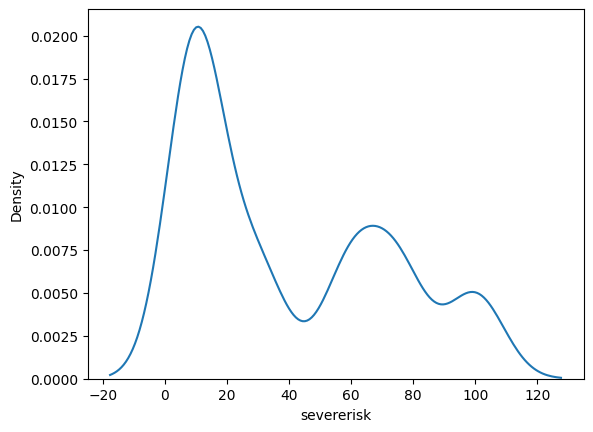

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(data = data, x = 'severerisk')
plt.show()

In [13]:
median_severerisk = data['severerisk'].median()
data['severerisk'].fillna(median_severerisk, inplace=True)

C:\Users\ss198\AppData\Local\Temp\ipykernel_19960\3126980123.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['severerisk'].fillna(median_severerisk, inplace=True)


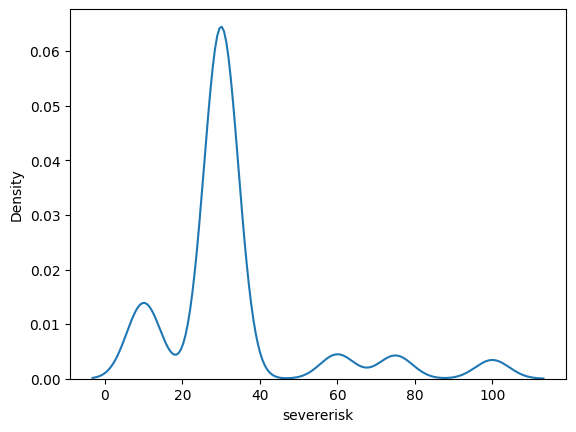

In [14]:
sns.kdeplot(data['severerisk'])
plt.show()

In [15]:
features = ['tempmax', 'tempmin', 'humidity', 'dew']
target = 'precip'
data = data.dropna(subset=features + [target])

In [16]:
X = data[features]
y = data[target]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

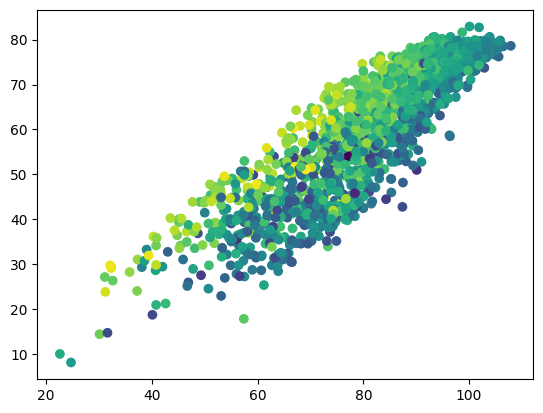

In [23]:
plt.scatter(x=data['tempmax'], y=data['tempmin'],c=data['humidity'])
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

MSE:  0.049747708518265
RMSE:  0.2230419434058648
R2:  0.16619844427894748


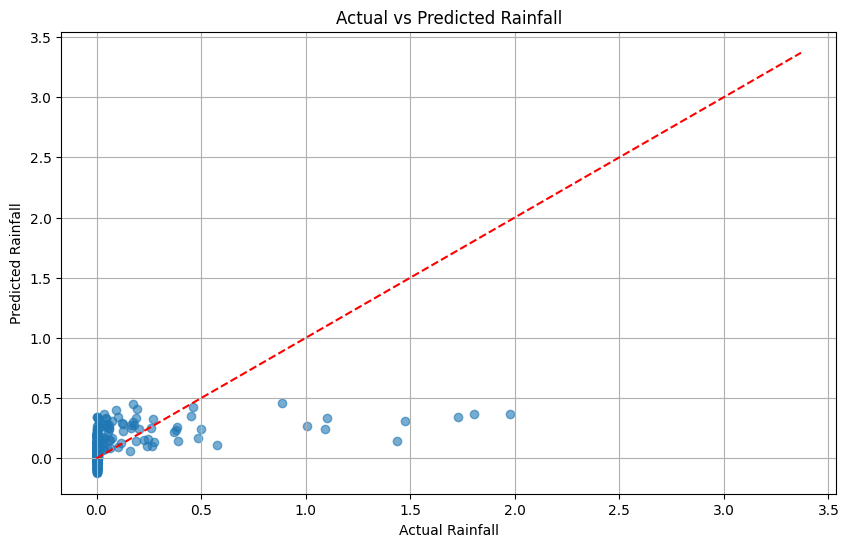

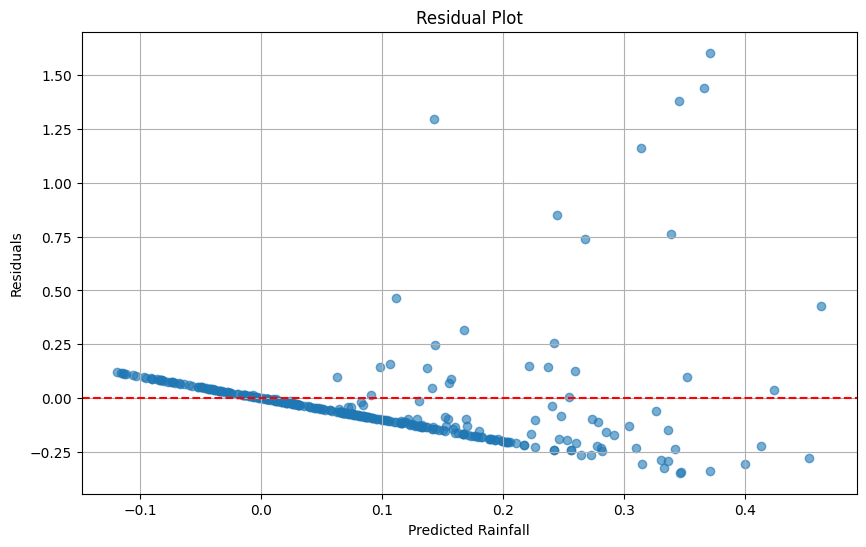

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.grid()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.grid()
plt.show()